In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_sample = 10000
np.random.seed(20190606)
X = np.random.random(num_sample)*100
u = np.random.normal(loc=0, scale= 0.5, size=num_sample)
y = -1.2*np.sin(0.3*X) + 1.5*np.cos(1.7*X) + u

In [3]:
init_param = np.array([-1.5, 0.5, 1.7, 1.8])
z0 = init_param[0]*np.sin(init_param[1]*X) + init_param[2]*np.cos(init_param[3]*X)

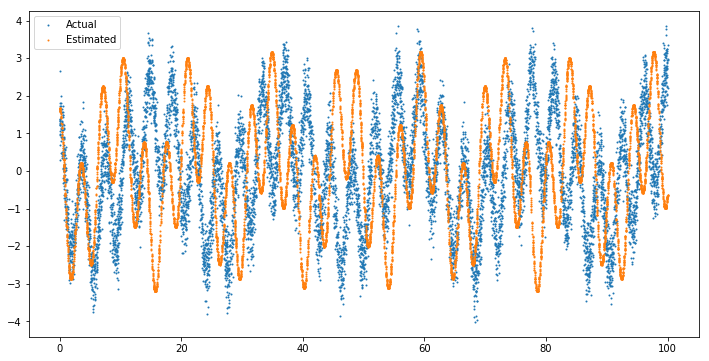

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z0, s=1, label='Estimated')
plt.legend()
plt.show()

### 1. Batch Gradient Descent

In [5]:
learning_rate = 1e-2
param = init_param
for i in range(1001):
    z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
    loss = np.mean((z-y)**2)
    
    grad = np.array([
        np.mean(2*(z-y)*np.sin(param[1]*X)),
        np.mean(2*(z-y)*param[0]*param[1]*np.cos(param[1]*X)),
        np.mean(2*(z-y)*np.cos(param[3]*X)),
        np.mean(2*(z-y)*param[2]*param[3]*(-np.sin(param[3]*X)))
    ])
    
    param = param - learning_rate * grad
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 4.76418, Updated Parameter: [-1.48597379  0.4997779   1.68179786  1.79141581]
i:   100, Loss: 1.12559, Updated Parameter: [-0.60150713  0.4982427   1.45887477  1.69997828]
i:   200, Loss: 1.00538, Updated Parameter: [-0.27254659  0.49816678  1.49698019  1.70004141]
i:   300, Loss: 0.98881, Updated Parameter: [-0.15045695  0.49813317  1.51149283  1.70006478]
i:   400, Loss: 0.98652, Updated Parameter: [-0.1051331   0.49811535  1.51701479  1.70007345]
i:   500, Loss: 0.98620, Updated Parameter: [-0.08829325  0.49810409  1.51911394  1.70007668]
i:   600, Loss: 0.98616, Updated Parameter: [-0.0820242   0.4980961   1.51991126  1.70007788]
i:   700, Loss: 0.98616, Updated Parameter: [-0.07968051  0.49809013  1.52021389  1.70007833]
i:   800, Loss: 0.98616, Updated Parameter: [-0.07879659  0.49808557  1.52032871  1.7000785 ]
i:   900, Loss: 0.98616, Updated Parameter: [-0.0784573   0.49808208  1.52037227  1.70007856]
i:  1000, Loss: 0.98616, Updated Parameter: [-0.07832258  0.

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 2. Stochastic Gradient Descent

In [6]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])

        param = param - learning_rate * grad
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.24138, Updated Parameter: [-0.60577642  0.49941975  1.5009301   1.70456104]
i:   100, Loss: 1.26452, Updated Parameter: [-0.07725772  0.49829906  1.44140549  1.70479817]
i:   200, Loss: 0.94108, Updated Parameter: [-0.0811185   0.49824451  1.4352502   1.69699242]
i:   300, Loss: 0.81382, Updated Parameter: [-0.07643993  0.49791596  1.45063903  1.69815088]
i:   400, Loss: 1.23631, Updated Parameter: [-0.07678573  0.49789336  1.43332786  1.69840254]
i:   500, Loss: 1.08614, Updated Parameter: [-0.07088822  0.49819279  1.45850549  1.70490279]
i:   600, Loss: 0.96153, Updated Parameter: [-0.07980773  0.49799965  1.4491202   1.6977625 ]
i:   700, Loss: 1.03281, Updated Parameter: [-0.08149611  0.497764    1.44445902  1.70052545]
i:   800, Loss: 0.99577, Updated Parameter: [-0.07419899  0.49764072  1.43877172  1.70283487]
i:   900, Loss: 1.26821, Updated Parameter: [-0.08505445  0.49835319  1.45320507  1.69584289]
i:  1000, Loss: 1.08717, Updated Parameter: [-0.08371096  0.

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 3. Momentum

In [8]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
gamma = 0.9
param = init_param
v = np.zeros(4)
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        v = gamma*v + learning_rate * grad
        param = param - v
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.59019, Updated Parameter: [ 0.09634134  0.41383864 -0.04266252  1.81680324]
i:   100, Loss: 2.18204, Updated Parameter: [-0.09319494  0.42924275  0.02078218  2.06730116]
i:   200, Loss: 2.41792, Updated Parameter: [-0.09577254  0.42554171 -0.00354341  2.1821189 ]
i:   300, Loss: 2.39484, Updated Parameter: [-0.05658908  0.43166193 -0.0139189   2.20225656]
i:   400, Loss: 2.11395, Updated Parameter: [-0.11586276  0.42625057  0.01219578  2.0191811 ]
i:   500, Loss: 2.55965, Updated Parameter: [ 0.01033866  0.41597715 -0.12946191  2.11917349]
i:   600, Loss: 1.76157, Updated Parameter: [ 0.05658529  0.41586931 -0.11379939  2.12832376]
i:   700, Loss: 2.06800, Updated Parameter: [-0.02651206  0.42740049 -0.14188424  2.06311334]
i:   800, Loss: 2.09896, Updated Parameter: [-0.11535192  0.42832203  0.12107521  2.08256275]
i:   900, Loss: 1.98920, Updated Parameter: [-0.06103559  0.42895693  0.04336544  2.19651557]
i:  1000, Loss: 1.92060, Updated Parameter: [ 0.04681676  0.

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 4. Nesterov Accelerated Gradient(NAG)

In [10]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
gamma = 0.9
param = init_param
v = np.zeros(4)
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)
        
        z_sample_2 = (param[0]-gamma*v[0])*np.sin((param[1]-gamma*v[1])*X_sample) + (param[2]-gamma*v[2])*np.cos((param[3]-gamma*v[3])*X_sample)
        grad = np.array([
            np.mean(2*(z_sample_2-y_sample)*np.sin((param[1]-gamma*v[1])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*(param[0]-gamma*v[0])*(param[1]-gamma*v[1])*np.cos((param[1]-gamma*v[1])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*np.cos((param[3]-gamma*v[3])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*(param[2]-gamma*v[2])*(param[3]-gamma*v[3])*(-np.sin((param[3]-gamma*v[3])*X_sample)))
        ])
        
        v = gamma*v + learning_rate * grad
        param = param - v
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.92677, Updated Parameter: [-0.06411963  0.50327046 -0.06169017  1.44633971]
i:   100, Loss: 2.01786, Updated Parameter: [ 0.06670848  0.4755227  -0.00399847  1.38973203]
i:   200, Loss: 1.85660, Updated Parameter: [ 0.07346866  0.47592178 -0.00532417  1.39354508]
i:   300, Loss: 2.26804, Updated Parameter: [-0.11840935  0.49923418 -0.08918294  1.3401169 ]
i:   400, Loss: 2.29686, Updated Parameter: [-0.05908794  0.49872652  0.00751032  1.39471309]
i:   500, Loss: 2.97781, Updated Parameter: [0.07087865 0.47645217 0.01272396 1.39262514]
i:   600, Loss: 2.35298, Updated Parameter: [ 0.09367873  0.47678393 -0.02868203  1.34146054]
i:   700, Loss: 2.08519, Updated Parameter: [ 0.10313069  0.47057984 -0.06429783  1.3541149 ]
i:   800, Loss: 2.31082, Updated Parameter: [-0.0202605   0.49546602 -0.01981183  1.38352751]
i:   900, Loss: 2.18105, Updated Parameter: [0.0734942  0.47590614 0.0361661  1.39232187]
i:  1000, Loss: 2.26254, Updated Parameter: [-0.06081971  0.49173224

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 5. Adagrad

In [12]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
G = np.zeros(4)
eps = 1e-4
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = G + grad**2
        param = param - learning_rate/np.sqrt(G+eps)*grad
        
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.87135, Updated Parameter: [-1.32612764  0.49509675  1.58824441  1.70031606]
i:   100, Loss: 0.95406, Updated Parameter: [-0.21219289  0.49807699  1.51919834  1.700204  ]
i:   200, Loss: 0.93166, Updated Parameter: [-0.10024167  0.49806813  1.51996358  1.7002216 ]
i:   300, Loss: 0.84278, Updated Parameter: [-0.08198932  0.49807892  1.52018936  1.69971279]
i:   400, Loss: 1.21910, Updated Parameter: [-0.07885984  0.49806658  1.5202482   1.70016932]
i:   500, Loss: 1.07084, Updated Parameter: [-0.07831874  0.49807384  1.5202765   1.70005851]
i:   600, Loss: 0.92373, Updated Parameter: [-0.07819866  0.49807656  1.52032044  1.70020099]
i:   700, Loss: 1.00438, Updated Parameter: [-0.07815962  0.49806901  1.5202832   1.70016436]
i:   800, Loss: 1.03427, Updated Parameter: [-0.0781527   0.49807723  1.52030216  1.699991  ]
i:   900, Loss: 0.88412, Updated Parameter: [-0.07816249  0.49807277  1.52028534  1.69999503]
i:  1000, Loss: 1.11977, Updated Parameter: [-0.07816396  0.

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 6. RMSProp

In [14]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
G = np.zeros(4)
eps = 1e-4
gamma = 0.5
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = gamma*G + (1-gamma)*grad**2
        param = param - learning_rate/np.sqrt(G+eps)*grad
        
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 0.38371, Updated Parameter: [-1.16173085  0.3059413   1.45878119  1.6950668 ]
i:   100, Loss: 0.20461, Updated Parameter: [-1.1960356   0.29608339  1.45142737  1.70390412]
i:   200, Loss: 0.45003, Updated Parameter: [-1.17742517  0.30776201  1.47177878  1.70816044]
i:   300, Loss: 0.36630, Updated Parameter: [-1.15000913  0.30621754  1.4570652   1.69180335]
i:   400, Loss: 0.36762, Updated Parameter: [-1.15273287  0.30261616  1.43573804  1.69759885]
i:   500, Loss: 0.48834, Updated Parameter: [-1.17838761  0.30679451  1.45007956  1.70423332]
i:   600, Loss: 0.33949, Updated Parameter: [-1.21082731  0.29800055  1.47664081  1.69507546]
i:   700, Loss: 0.26296, Updated Parameter: [-1.16575891  0.3040842   1.49114589  1.70178786]
i:   800, Loss: 0.42087, Updated Parameter: [-1.14870732  0.29517541  1.45162228  1.7063566 ]
i:   900, Loss: 0.46195, Updated Parameter: [-1.14809754  0.30650142  1.44697298  1.6946206 ]
i:  1000, Loss: 0.23442, Updated Parameter: [-1.15428681  0.

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 7. AdaDelta

In [16]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
param = init_param
G = np.zeros(4)
eps = 1e-4
gamma = 0.5
s = np.zeros(4)
delta = np.zeros(4)
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = gamma*G + (1-gamma)*grad**2
        delta = np.sqrt(s+eps)/np.sqrt(G+eps)*grad
        param = param - delta
        s = gamma*s + (1-gamma)*delta**2
        
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 2.32369, Updated Parameter: [-0.81317033  0.31796294  0.64198026  1.72161718]
i:   100, Loss: 1.34038, Updated Parameter: [-0.83011341  0.29074181  0.60318304  1.71533082]
i:   200, Loss: 2.45640, Updated Parameter: [-0.6376383   0.31257967  0.58390234  1.7215858 ]
i:   300, Loss: 1.33068, Updated Parameter: [-0.77813435  0.28043389  0.56110646  1.67185679]
i:   400, Loss: 1.85784, Updated Parameter: [-0.71501015  0.28283065  0.53745786  1.72503357]
i:   500, Loss: 1.38858, Updated Parameter: [-0.85745241  0.31594608  0.57836309  1.68083274]
i:   600, Loss: 1.07155, Updated Parameter: [-0.78304648  0.2848732   0.56815712  1.72232061]
i:   700, Loss: 2.05710, Updated Parameter: [-0.61482606  0.30987111  0.61855511  1.67604979]
i:   800, Loss: 1.37027, Updated Parameter: [-0.79616638  0.28073092  0.65418259  1.67737297]
i:   900, Loss: 2.29601, Updated Parameter: [-0.72960448  0.32036643  0.57963848  1.72997258]
i:  1000, Loss: 2.84121, Updated Parameter: [-0.62492395  0.

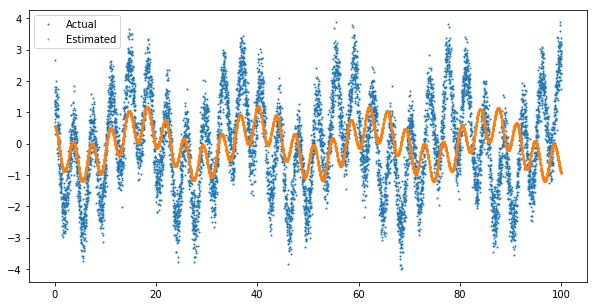

In [17]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 8. Adam

In [18]:
batch_size = 100
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
param = init_param
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = np.zeros(4)
v = np.zeros(4)
learning_rate = 0.1
for i in range(1001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*grad**2
        m_hat = m/(1-beta1)
        v_hat = v/(1-beta2)
        
        param = param - learning_rate*m_hat/np.sqrt(v_hat+eps)
        
    if(i%100 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.75683, Updated Parameter: [-2.22513637e-03  6.33306895e-01 -1.35146873e-03  2.00374572e+00]
i:   100, Loss: 1.40232, Updated Parameter: [-1.19291039  0.30187124 -0.08211105  0.01563378]
i:   200, Loss: 1.44161, Updated Parameter: [-1.13318041e+00  2.96309486e-01  2.87033956e-02 -3.02521720e-06]
i:   300, Loss: 1.54598, Updated Parameter: [-1.19753752e+00  2.89373998e-01  1.48660328e-02 -8.91912456e-08]
i:   400, Loss: 1.76935, Updated Parameter: [-1.18773094e+00  3.00797247e-01 -2.62931604e-02 -3.51332105e-08]
i:   500, Loss: 1.44176, Updated Parameter: [-1.25868711e+00  3.04381329e-01  1.07638533e-01 -2.20189534e-08]
i:   600, Loss: 1.28975, Updated Parameter: [-1.17630742e+00  3.10460919e-01 -2.39933668e-02 -1.58299290e-08]
i:   700, Loss: 1.64310, Updated Parameter: [-1.22578934e+00  3.01841233e-01  1.44555814e-02 -1.23543765e-08]
i:   800, Loss: 1.47208, Updated Parameter: [-1.10777797e+00  2.88988567e-01  3.52576993e-03 -1.01000586e-08]
i:   900, Loss: 1.56053, U

In [ ]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()